# Three Missionaries and Three Cannibals Problem
## Problem Statement
Three missionaries and three cannibals are on one side of a river, along with a boat that can hold one or two people. Find a way to get everyone to the other side without ever leaving a group of missionaries in one place outnumbered by the cannibals in that place.  
*(Artificial Intelligence Mordem Approach - 3rd Edition - Exercise 3.9)*
## Questions
a. Formulate the problem precisely, making only those distinctions necessary to ensure a
valid solution. Draw a diagram of the complete state space.  
b. Implement and solve the problem optimally using an appropriate search algorithm. Is it
a good idea to check for repeated states?  
c. Why do you think people have a hard time solving this puzzle, given that the state space
is so simple?  
## Solutions
### a. Formulate the problem:  
- **State representation**  
Three integers listing the number of missionaries, cannibals and boats on the left bank.  
`state: (nr_missionaries, nr_cannibals, n_boats)`.   
- **Initial state**  
`(3, 3, 1)`  
- **Goal state**  
`(0, 0, 0)`  
- **Actions**  
Move one missionary, from left to right: `state - (1, 0, 1)`   
Move one missionary, from right to left: `state + (1, 0, 1)`   
Move two missionaries, from left to right: `state - (2, 0, 1)`   
Move two missionaries, from right to left: `state + (2, 0, 1)`   
Move one cannibals, from left to right: `state - (0, 1, 1)`   
Move one cannibals, from right to left: `state + (0, 1, 1)`   
Move two cannibals, from left to right: `state - (0, 2, 1)`   
Move two cannibals, from right to left: `state + (0, 2, 1)`   
Move one missionary, one cannibal from left to right: `state - (1, 1, 1)`   
Move one missionary, one cannibal from right to left: `state + (1, 1, 1)`   
- **Successor states**:  
Any states that no missionary is eaten.  
No missionary is eaten on the left bank: `state[0] >= state[1]`  
No missionary is eaten on the right bank: `3-state[0] >= 3-state[1]`  
No missionary is eaten: `state[0] >= state[1] and 3-state[0] >= 3-state[1]`  

### b. Implementation

#### Implement the basic elements of searching problem: initial, goal state, actions, neigbor states

In [63]:
import numpy as np

# state : (nr_missionaries, nr_cannibals, nr_boats) on the left bank
init = (3, 3, 1) # 3 missionaries, 3 cannibals, 1 boat on left bank
goal = (0, 0, 0) # nothing on left bank, all were moved to the right bank

actions = [
    (1,0,1), # move 1 missionary
    (2,0,1), # move 2 missionaries
    (0, 1, 1), # move 1 cannibal
    (0, 2, 1), # move 2 cannibals
    (1, 1, 1) # move 1 missionary, 1 cannibal
]

def neighbors(state):
    ans = []
    for action in actions:
        if state[2] == 1: # boat on left bank
            new_state = np.subtract(state, action)
        else: # boat on right bank
            new_state = np.add(state, action)
        
        if is_valid(new_state):
            ans.append(tuple(new_state))
    
    return ans
# end neighbors

def is_valid(state):
    if state[0] < 0 or state[0] > 3 or state[1] < 0 or state[1] > 3:
        return False
    
    no_eat_in_left = (state[0] == 0) or (state[0] >= state[1])
    no_eat_in_right = (3 - state[0] == 0) or (3 - state[0] >= 3 - state[1])
    return no_eat_in_left and no_eat_in_right
# end is_valid

#### Build the search tree

In [64]:
# build search tree
import networkx as nx

g = nx.Graph()
visited = set()

def dfs(state):
    if state in visited:
        return
    visited.add(state)
    for neighbor in neighbors(state):
        if neighbor in visited:
            continue
        g.add_edge(state, neighbor)
        dfs(neighbor)

In [65]:
dfs(init)

#### Draw the search tree

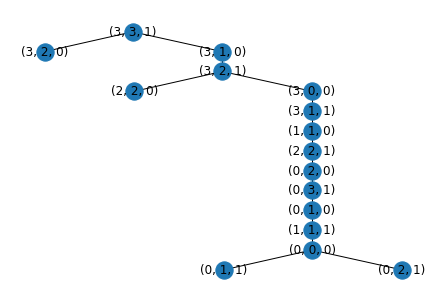

In [66]:
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

pos = nx.nx_agraph.graphviz_layout(g, prog='dot')
nx.draw(g, pos)
nx.draw_networkx_labels(g, pos)
plt.show()

#### Find paths from initial state to goal state

In [67]:
paths = nx.all_shortest_paths(g, init, goal)

for p in paths:
    print('\n'.join(map(str, p)))
    print('==========')

(3, 3, 1)
(3, 1, 0)
(3, 2, 1)
(3, 0, 0)
(3, 1, 1)
(1, 1, 0)
(2, 2, 1)
(0, 2, 0)
(0, 3, 1)
(0, 1, 0)
(1, 1, 1)
(0, 0, 0)


### c. Why do you think people have a hard time solving this puzzle, given that the state space is so simple?
Almost moves lead to either illegal or previous state, that make us hard to find a path to goal.